/var/folders/9x/g_kvtjdj1pjf5r2kff4d1n_r0000gn/T/ipykernel_3993/1031549353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['4yr_gdp'] = gdp[['2015', '2016', '2017', '2018']].mean(axis=1)


Happiness Model MSE: 1.2546039146199732 Happiness r^2: 0.002444887150755637
Freedom Model MSE: 0.019164080490029732 Freedom r^2: 0.03157109827102267
Corruption Model MSE: 0.010748284206031074 Corruption r^2: 0.0037663300097497965
Health Model MSE: 0.05096121926905134 Health r^2: 0.0008943381968051778
Ttest_indResult(statistic=1.7851760818817874, pvalue=0.07946192861371383)


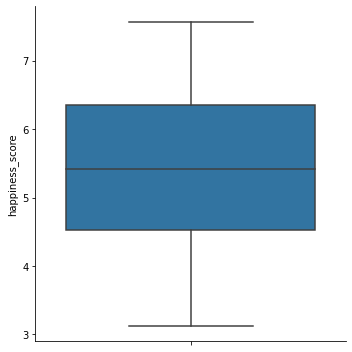

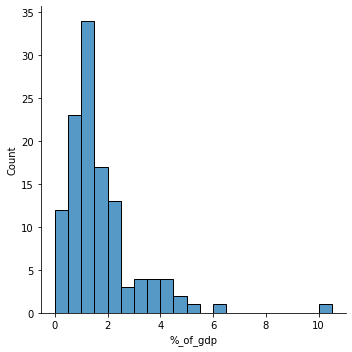

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


#MERGING

#getting average military expenditure 
total_military_expenditure = pd.read_csv('militaryexpenditure.csv')
military_expenditure = total_military_expenditure[['Name','2015','2016', '2017', '2018']].dropna() #drop rows with NaN
military_expenditure['4yr_military'] = military_expenditure[['2015', '2016', '2017', '2018']].mean(axis=1)
military_4yr = military_expenditure[['Name','4yr_military']]

#getting average overall gdp
total_gdp = pd.read_csv('gdp.csv')
gdp = total_gdp[['Country Name', '2015', '2016', '2017', '2018']]
gdp['4yr_gdp'] = gdp[['2015', '2016', '2017', '2018']].mean(axis=1)
gdp_4yr = gdp[['Country Name','4yr_gdp']]


#merging gdp and military expenditure datasets
full_data = pd.merge(military_4yr, gdp_4yr, how='inner', left_on = 'Name', right_on='Country Name')
#military_4yr: 191 rows
#gdp_4yr: 266 rows
#full_data: 188 rows

#creating military expenditure as % of GDP column
full_data = full_data.drop(['Country Name'], axis=1)
full_data = full_data.rename(columns = {'Name': 'Country'})
full_data['%_of_gdp'] = full_data['4yr_military']/full_data['4yr_gdp']*100 

#getting average happiness scores from 2015-2018 per country
happiness_2020 = pd.read_csv("WorldHappiness_Corruption_2015_2020.csv")
happiness = happiness_2020[(happiness_2020['Year'] != 2020) & (happiness_2020['Year'] != 2019)].drop(['Year'], axis=1)

happiness = happiness.groupby('Country').aggregate('mean')
#happiness: 132 rows

#merging the happiness scores and military expenditure as % of gdp columns
final_data = pd.merge(full_data, happiness, how='inner', left_on=['Country'], right_on=['Country']) #14 columns lost
#final_data: 119 rows


#CORRELATION: 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


data = final_data[['%_of_gdp']].values
'''the following models model happiness (and its  contributing factors of freedom, health, and 
government trust) as a function of the data. We run these models 4 times with different data points:
1) %_of_gdp - happiness as a function of military expenditure gdp %
2) 4yr_gdp - happiness as a function of overall average gdp 
3) 4yr_military - happiness as a function of overall military expenditure 
4) happiness_score - happiness factors as a function of overall happiness
'''

#overall happiness column: 'happiness_score'
happiness_target = final_data['happiness_score'].values
happiness_model = LinearRegression()
happiness_model.fit(X=data, y=happiness_target) #fits model to the data
predicted = happiness_model.predict(data) #predict it
happiness_mse = mean_squared_error(happiness_target,predicted) # float: MSE of your model, what it is and what it shoudl be different
happiness_r2 = r2_score(happiness_target, predicted) # float: R^2 score of your model

#correlation
#r = np.corrcoef(happiness_target, predicted)
#print (r[0,1])

#perception of freedom column: 'freedom'
freedom_target = final_data['freedom'].values
freedom_model = LinearRegression()
freedom_model.fit(X=data, y=freedom_target) #fits model to the data
predicted = freedom_model.predict(data) #predict it
freedom_mse = mean_squared_error(freedom_target,predicted) # float: MSE of your model, what it is and what it shoudl be different
freedom_r2 = r2_score(freedom_target, predicted) # float: R^2 score of your model

#perception of corruption column:'government_trust'
corruption_target = final_data['government_trust'].values
corruption_model = LinearRegression()
corruption_model.fit(X=data, y=corruption_target) #fits model to the data
predicted = corruption_model.predict(data) #predict it
corruption_mse = mean_squared_error(corruption_target,predicted) # float: MSE of your model, what it is and what it shoudl be different
corruption_r2 = r2_score(corruption_target, predicted) # float: R^2 score of your model

#life expectancy column:'health'
health_target = final_data['health'].values
health_model = LinearRegression()
health_model.fit(X=data, y=health_target) #fits model to the data
predicted = health_model.predict(data) #predict it
health_mse = mean_squared_error(health_target,predicted) # float: MSE of your model, what it is and what it shoudl be different
health_r2 = r2_score(health_target, predicted) # float: R^2 score of your model

print("Happiness Model MSE:", happiness_mse, "Happiness r^2:", happiness_r2)
print("Freedom Model MSE:", freedom_mse, "Freedom r^2:", freedom_r2)
print("Corruption Model MSE:", corruption_mse, "Corruption r^2:", corruption_r2)
print("Health Model MSE:", health_mse, "Health r^2:", health_r2)

#results when data = '%_of_gdp':
'''Happiness Model MSE: 1.2546039146199732 Happiness r^2: 0.002444887150755637
Freedom Model MSE: 0.019164080490029732 Freedom r^2: 0.03157109827102267
Corruption Model MSE: 0.010748284206031074 Corruption r^2: 0.0037663300097497965
Health Model MSE: 0.05096121926905134 Health r^2: 0.0008943381968051778'''
#almost no correlation, but low MSE for most besides happiness

#results when data = '4yr_gdp':
'''Happiness Model MSE: 1.2074921968966192 Happiness r^2: 0.03990414767305184
Freedom Model MSE: 0.019403346721096587 Freedom r^2: 0.01948012769231655
Corruption Model MSE: 0.010750138210718203 Corruption r^2: 0.003594486591932289
Health Model MSE: 0.04880633957005264 Health r^2: 0.04314121805279503'''
#almost no correlation, but low MSE for most besides happiness

#results when data = '4yr_military':
'''Happiness Model MSE: 1.2235327332777737 Happiness r^2: 0.027150067366589536
Freedom Model MSE: 0.019606086693356985 Freedom r^2: 0.009234958414570893
Corruption Model MSE: 0.010770958048517477 Corruption r^2: 0.0016647438514366675
Health Model MSE: 0.04989951508855314 Health r^2: 0.021709276950440226'''
#almost no correlation, but low MSE for most besides happiness

#results when data = 'happiness score':
'''
Freedom Model MSE: 0.013155900347045313 Freedom r^2: 0.3351857329667688
Corruption Model MSE: 0.00828957300827938 Corruption r^2: 0.23165859942032774
Health Model MSE: 0.018259355526793475 Health r^2: 0.64202140864444'''
#as expected, there is correlation for each, because higher happiness means higher contributing factors
#BUT interesting that the health factor has the strongest correlation with overall happiness, it is most strongly affected


small_spenders = final_data[final_data['%_of_gdp'] <= np.percentile(final_data['%_of_gdp'], 25)]
small_spenders = small_spenders["happiness_score"]

big_spenders = final_data[final_data['%_of_gdp'] >= np.percentile(final_data['%_of_gdp'], 75)]
big_spenders = big_spenders["happiness_score"]

hypothesis_test = stats.ttest_ind(small_spenders, big_spenders)
print(hypothesis_test)
'''
Null hypothesis for this hypothesis test is that countries that spend more % of their GDP on their military and countries
that spend a smaller % of their GDP on their military have the same happiness scores.

Results: Ttest_indResult(statistic=1.7851760818817874, pvalue=0.07946192861371383)

Since the p-value is >0.05, we fail to reject the null hypothesis. There is not convincing evidence that countries that
spend more % of GDP on their military have different happiness scores than countries that spend less % of their GDP on
their militaries.
'''

#sns.relplot(x=final_data['%_of_gdp'], y=final_data['happiness_score'])
sns.catplot(data=final_data, y="happiness_score", kind="box")

##Histogram of military spending for frequency of countries
sns.displot(data = final_data, x = '%_of_gdp', binwidth = .5)